In [73]:
# Import necessary functions

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from PIL import Image

In [74]:
alexnet = models.alexnet(pretrained=True)
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [75]:
# Extracting contents from alexnet
print(alexnet.features[0].weight.shape)
print(alexnet.features[0].weight[0][0][0][0])

torch.Size([64, 3, 11, 11])
tensor(0.1186, grad_fn=<SelectBackward0>)


In [76]:
resnet18 = models.resnet18(pretrained=True)
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [77]:
x = resnet18.layer1[0].conv1.weight.data
print(x.min(), x.max())


tensor(-0.7993) tensor(0.6196)


In [78]:
# Function to plot the filters 
def plotFiltersInRGB(filterWeights,numFilters=64) -> None:
    
    # Normalize the filter weights
    wmin = filterWeights.min()
    wmax = filterWeights.max()
    filterWeights = (filterWeights - wmin) / (wmax - wmin)
    
    # Filter weights are of the form (numFilters,numChannels,filterHeight,filterWidth)
    numChannels = filterWeights.shape[1]
    
    # Create a figure to plot the filters in a grid
    fig,axes = plt.subplots(8,8,figsize=(12,12))
    
    # Looping and plotting filters in 8x8 grid  
    for index in range(numFilters):
        ax = axes[index//8,index%8] # index // 8 denotes \floor(index/8) and index % 8 denotes index mod 8
        
        if(numChannels == 3):
            # 1. Convert from (C,H,W) --> (H,W,C)
            image = filterWeights[index].permute(1,2,0).numpy()
            
            # 2. Display RGB Image
            ax.imshow(image)
        else:
            # For Grayscale filters
            image = filterWeights[index,0].numpy()
            ax.imshow(image,cmap='gray')
            
        ax.axis('off')
        
    plt.show()
        
        

In [79]:
# Function to get the layer 1 filters
def visualizeFirstLayer(model,modelname: str) -> None:
    filters = None
    
    # Check if the model is AlexNet,ResNet
    if isinstance(model, models.AlexNet):
        filters = model.features[0].weight.data # Weights of first convolutional layer in AlexNet
    elif isinstance(model, models.ResNet):
        filters = model.conv1.weight.data  # Weights of first convolutional Layer in ResNet model
    elif isinstance(model, models.DenseNet):
        filters = model.features[0].weight.data
    else:
        raise ValueError("Unsupported model type received")
    
    print(f"Visualizing first 64 Filters of {modelname} -> ")
    plotFiltersInRGB(filters,numFilters=64)
        

In [80]:
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)

Visualizing first 64 Filters of AlexNet -> 


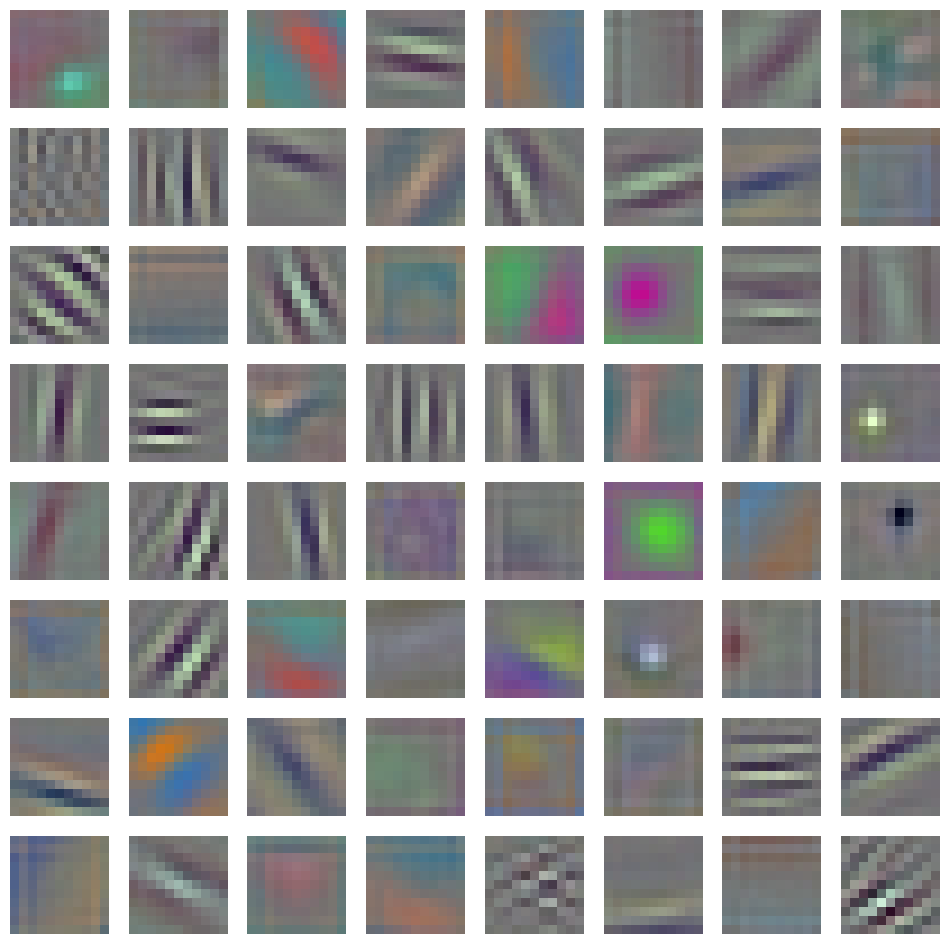

In [81]:
visualizeFirstLayer(alexnet, "AlexNet")

Visualizing first 64 Filters of ResNet 18 -> 


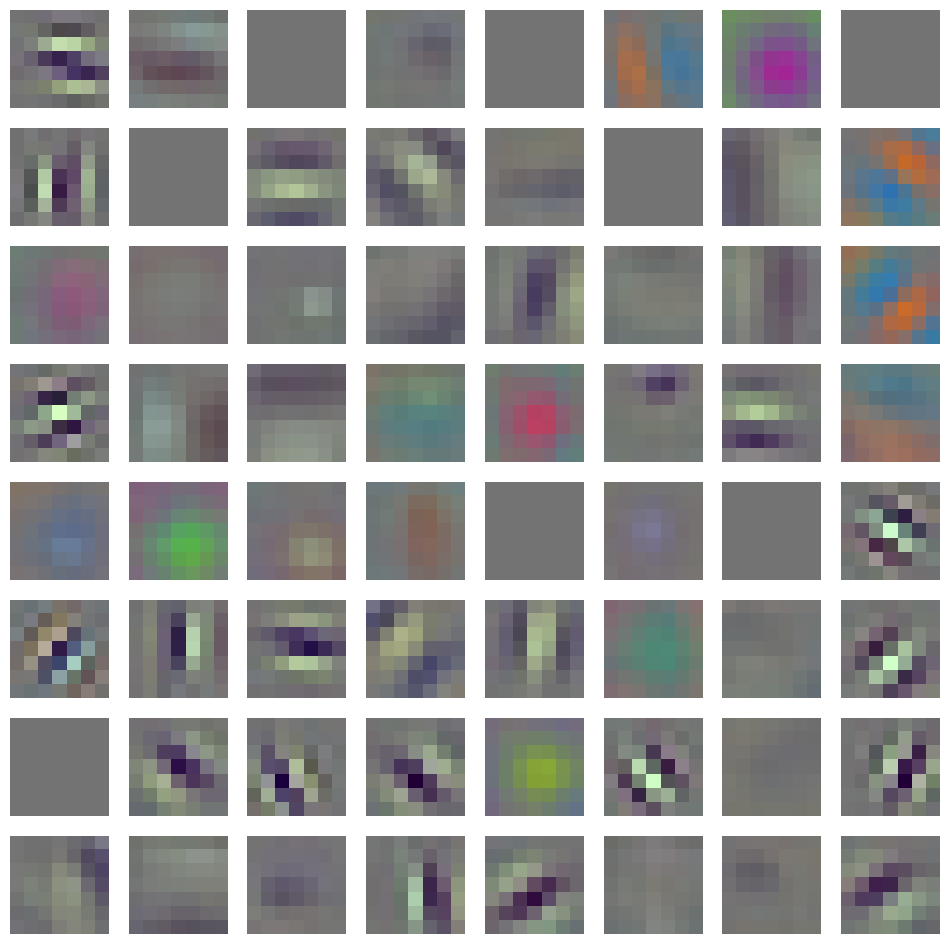

In [82]:
visualizeFirstLayer(resnet18, "ResNet 18")

In [83]:
# Get Densenet121
densenet = models.densenet121(pretrained=True)
print(densenet)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Visualizing first 64 Filters of DenseNet 121 -> 


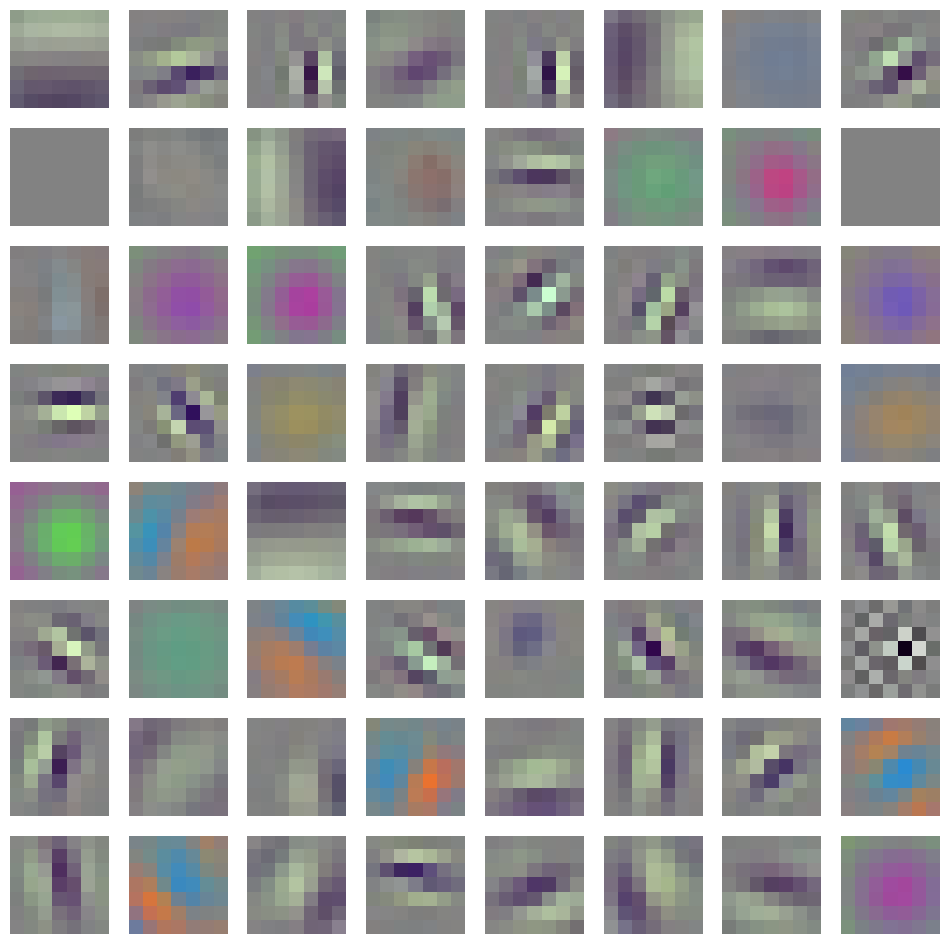

In [84]:
visualizeFirstLayer(densenet, "DenseNet 121")

# Visualizing Activation Maps

In [85]:
# Loading the model
model = models.vgg19(pretrained=True)
model.eval()

# Define required transformation
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  
                         std=[0.229, 0.224, 0.225])
])

# Defining a function to pre process the image
def preprocessImage(imagePath):
    
    # Define transform
    preprocess = transforms.Compose([
        transforms.Resize((254,254)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    ])
    
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image)   # Data preprocessing
    image = image.unsqueeze(0)  # Add batch dimension to make it of the form (1,channels,height,width)
    return image

image_path = "../TestImages/test6.png"
inputImage = preprocessImage(image_path)



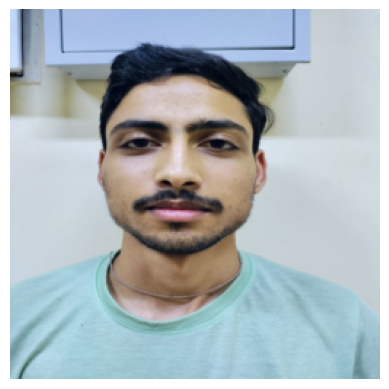

In [86]:
# plot the image
def plotImage(image):
    image = image.squeeze(0)     # Remove batch dimension
    image = image.permute(1,2,0) # (C,H,W) --> (H,W,C)
    image = image.numpy()
    image = (image - np.min(image)) / (np.max(image) - np.min(image)) # Normalize the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
plotImage(inputImage)

In [87]:
# Now image is ready to be passed into VGG19

# Pass the image through the model
output = model(inputImage)

# Apply softmax to get probabilities
probabilities = F.softmax(output, dim=1)

# Get the index of the top predicted class
_, predicted_class = probabilities.max(1)

# Load ImageNet class labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
with open("imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

# Print the predicted class and label
print(f"Predicted class index: {predicted_class.item()}")
print(f"Predicted label: {labels[predicted_class.item()]}")

--2024-10-12 15:34:25--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.3’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2024-10-12 15:34:25 (17.8 MB/s) - ‘imagenet_classes.txt.3’ saved [10472/10472]

Predicted class index: 487
Predicted label: cellular telephone


In [88]:
# Get the top 5 predictions with their probabilities
top5_prob, top5_catid = torch.topk(probabilities, 5)

# Print the top 5 predictions along with their probabilities
for i in range(top5_prob.size(1)):
    print(f"{labels[top5_catid[0, i]]}: {top5_prob[0, i].item() * 100:.2f}%")


cellular telephone: 3.48%
Band Aid: 3.43%
spatula: 3.03%
jersey: 2.77%
syringe: 2.25%


In [89]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

activation shape: torch.Size([1, 128, 127, 127])
Visualizing activation maps for layer 1
Number of filters: 128


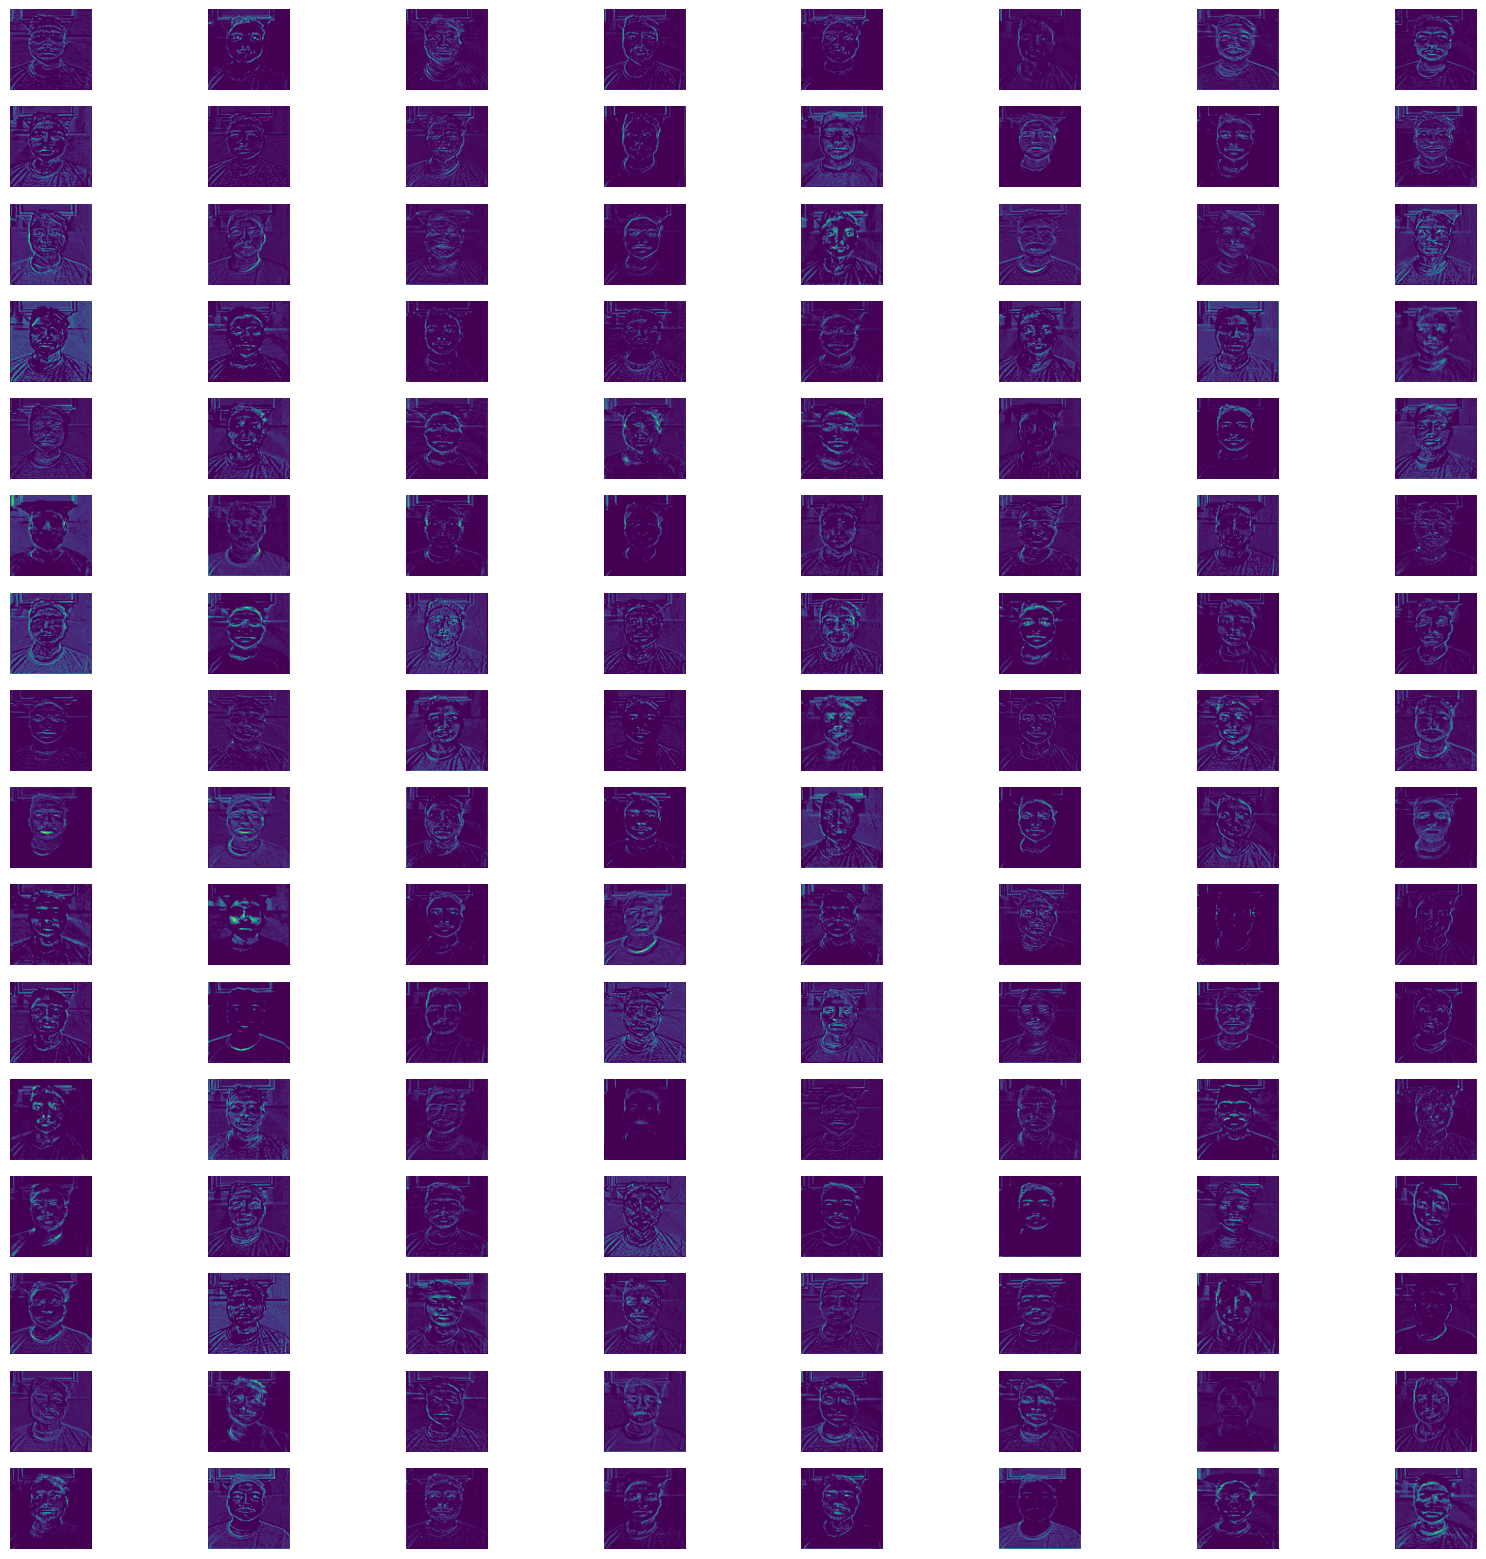

In [93]:
# Define a hook function to capture the activations

def hookFunction(module, input, output):
    activations.append(output)
    
# List to store activation maps
activations = []

# Register hooks to capture activations from all convolutional layers
hooks = []
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        hook = module.register_forward_hook(hookFunction)
        hooks.append(hook)

# Forward pass through the network
with torch.no_grad():
    output = model(inputImage)
    
# Remove hooks
for hook in hooks:
    hook.remove()
    
# Define a function to visualize the activation maps
def visualize_activation(activationMaps, numColumns=8):
    
    numLayers = len(activationMaps)
    for i in range(numLayers):
        activation = activationMaps[i]
        numFilters = activation.size(1)
        
        print(f"activation shape: {activation.shape}")
        print(f"Visualizing activation maps for layer {i+1}")
        print(f"Number of filters: {numFilters}")
        # calculate the number of rows required
        numRows = (numFilters + numColumns - 1) // numColumns
        
        fig, axes = plt.subplots(numRows, numColumns, figsize=(20, 20))
        axes = axes.flatten()
        
        for j in range(numFilters):
            image = activation[0, j].cpu().numpy() # Extract jth filter from the activation map
            axes[j].imshow(image, cmap='viridis')
            axes[j].axis('off')
            
        # Turn off any remaining axes
        for k in range(numFilters, len(axes)):
            axes[k].axis('off')
            
        plt.show()
        
# Visualize the activation maps from the first convolutional layer
visualize_activation(activations[2:3])